# Кинематика К2
В этом проекте рассмотрено решение задачи К2 по передаточным отношениям в среде Python.

In [1]:
import matplotlib.pyplot as plt
from numpy import concatenate

def derivative(f,a,method='central',h=0.01):
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        print("Method must be 'central', 'forward' or 'backward'.")

Функция исходных данных по закону движения элемента системы.

In [2]:
def caseDriver(var, ts):
      driver = [
        lambda t : 3 * (t**2 - 5 * t),
        lambda t : 9 * t - 4 * t**2,
        lambda t : 7 * t - 4 * t**2,
        lambda t : 3 * (7 * t - 2 * t**2),
        lambda t : 3 * t**2 - 7 * t,
        lambda t : 11 * t - 6 * t**2,
        lambda t : 2 * (t**2 - 4),
        lambda t : 4 * t - t**2,
        lambda t : 2 * (t**2 - 3 * t),
        lambda t : 2 * t**2 - 9
      ]

      start = (2, 3, 2, 4, 5, 1, 5, 3, 2, 1)

      if var in (0, 3, 4, 7, 8, 9):
          speed = derivative(driver[var], ts)
          boost = derivative(lambda t: derivative(driver[var], t), ts)
      elif var in (1, 2, 5, 6):
          speed = driver[var](ts)
          boost = derivative(driver[var], ts)

      speedList = [
          ['4', '1'], ['4', '1'], ['5', '3'],
          ['B', 'C'], ['A', 'C'], ['B', '5'],
          ['A', 'C'], ['5', '1'],
          ['A', '3'], ['4', '2']
      ]

      boostList = [
          ['1', 'B', '5'],
          ['1', 'C', '5'],
          ['1', 'A', '4'],
          ['2', 'A', '5'],
          ['3', 'B', '4'],
          ['2', 'C', '4'],
          ['3', 'B', '4'],
          ['1', 'B', '4'],
          ['3', 'B', '5'],
          ['2', 'B', '5']
      ]

      return start[var], speed, boost, speedList[var], boostList[var]

Функция обработки передаточных отношений, заданных схемой.

In [3]:
r1, R1 = 2, 4
r2, R2 = 6, 8
r3, R3 = 12, 14

def pictDriver(var):
    global r1, r2, r3, R1, R2, R3
    start, speed, boost, speedList, boostList = caseDriver(var[1], ts)

    match var[0]:
        case 0:
          pict = {
              '1' : [0, 1, -r2/r3*R3/R1, -R3/R1, -1/r1, -1/R2*r2/r3*R3/R1],
              '2' : [0, -R1/R3*r3/r2, 1, r3/r2, 1/r1*R1/R3*r3/r2, 1/R2],
              '3' : [0, -R1/R3, r2/r3, 1, 1/r1*R1/R3, 1/R2*r2/r3],
              '4' : [0, -r1, r2/r3*R3/R1*r1, R3/R1*r1, 1, 1/R2*r2/r3*R3/R1*r1],
              '5' : [0, -R1/R3*r3/r2*R2, R2, r3/r2*R2, 1/r1*R1/R3*r3/r2*R2, 1]

          }

          pictW = {
              'A' : [pict['1'][start], R1],
              'B' : [pict['3'][start], r3],
              'C' : [pict['2'][start], R2]
          }

        case 1:
          pict = {
              '1' : [0, 1, -R2/R1, -r3/r2*R2/R1, -1/r1, -1/R3*r3/r2*R2/r1],
              '2' : [0, -R1/R2, 1, r3/r2, 1/r1*R1/R2, 1/R3*r3/r2],
              '3' : [0, -R1/R2*r2/r3, r2/r3, 1, 1/r1*R1/R2*r2/r3],
              '4' : [0, -r1, R2/R1*r1, r3/r2*R2/R1*r1, 1, 1/R3*r3/r2*R2/R1*r1],
              '5' : [0, -R1/R2*r2/r3*R3, r2/r3*R3, R3, 1/r1*R1/R2*r2/r3*R3, 1]

          }

          pictW = {
              'A' : [pict['1'][start], R1],
              'B' : [pict['2'][start], r2],
              'C' : [pict['3'][start], R3]
          }

        case 2:
          pict = {
              '1' : [0, 1, -R2/r3*R3/R1, -R3/R1, 1/r2*R2/r3*R3/R1, 1/r1],
              '2' : [0, -R1/R3*r3/R2, 1, r3/R2, -1/r2, -1/r1*R1/R3*r3/R2],
              '3' : [0, -R1/R3, R2/r3, 1, -1/r2*R2/r3, -1/r1*R1/R3],
              '4' : [0, R1/R3*r3/R2*r2, -r2, -r3/R2*r2, 1, 1/r1*R1/R3*r3/R2*r2],
              '5' : [0, r1, -R2/r3*R3/R1*r1, -R3/R1*r1, 1/r2*R2/r3*R3/R1*r1, 1]

          }

          pictW = {
              'A' : [pict['1'][start], r1],
              'B' : [pict['2'][start], R2],
              'C' : [pict['3'][start], R3]
          }

        case 3:
          pict = {
              '1' : [0, 1, R2/R1, -R3/r1, -1/r2*R2/R1, -1/r3*R3/r1],
              '2' : [0, R1/R2, 1, -R3/r1*R1/R2, -1/r2, -1/r3*R3/r1*R1/R2],
              '3' : [0, -r1/R3, -R2/R1*r1/R3, 1, 1/r2*R2/R1*r1/R3, 1/r3],
              '4' : [0, -R1/R2*r2, -r2, R3/r1*R1/R2*r2, 1, 1/r3*R3/r1*R1/R2*r2],
              '5' : [0, -r1/R3*r3, -R2/R1*r1/R3*r3, r3, 1/r2*R2/R1*r1/R3*r3, 1]

          }

          pictW = {
              'A' : [pict['1'][start], r1],
              'B' : [pict['2'][start], R2],
              'C' : [pict['3'][start], r3]
          }

        case 4:
          pict = {
              '1' : [0, 1, r2/R1, -R3/r1, 1/r3*R3/r1, 1/R2*r2/R1],
              '2' : [0, R1/r2, 1, -R3/r1*R1/r2, 1/r3*R3/r1*R1/r2, 1/r2],
              '3' : [0, -r1/R3, -r2/R1*r1/R3, 1, -1/r3, -1/R2*r2/R1*r1/R3],
              '4' : [0, r1/R3*r3, r2/R1*r1/R3*r3, -r3, 1/R2*r2/R1*r1/R3*r3],
              '5' : [0, R1/r2*R2, R2, -R3/r1*R1/r2*R2, 1/r3*R3/r1*R1/r2*R2, 1]

          }

          pictW = {
              'A' : [pict['1'][start], R1],
              'B' : [pict['2'][start], R2],
              'C' : [pict['3'][start], R3]
          }

        case 5:
          pict = {
              '1' : [0, 1, r2/R1, -R3/R2*r2/R1, 1/r3*R3/R2*r2/R1, 1/r1],
              '2' : [0, R1/r2, 1, -R3/R2, 1/r3*R3/R2, 1/r1*R1/r2],
              '3' : [0, -R1/r2*R2/R3, -R2/R3, 1, -1/r3, -1/r1*R1/r2*R2/R3],
              '4' : [0, R1/r2*R2/R3*r3, R2/R3*r3, -r3, 1, 1/r1*R1/r2*R2/R3*r3],
              '5' : [0, r1, r2/R1*r1, -R3/R2*r2/R1*r1, 1/r3*R3/R2*r2/R1*r1, 1]

          }

          pictW = {
              'A' : [pict['1'][start], r1],
              'B' : [pict['2'][start], r2],
              'C' : [pict['3'][start], R3]
          }

        case 6:
          pict = {
              '1' : [0, 1, -R2/R3*r3/r1, r3/r1, -1/R1, -1/r2*R2/R3*r3/r1],
              '2' : [0, -r1/r3*R3/R2, 1, -R3/R2, 1/R1*r1/r3*R3/R2, 1/r2],
              '3' : [0, r1/r3, -R2/R3, 1, -1/R1*r1/r3, -1/r2*R2/R3],
              '4' : [0, -R1, R2/R3*r3/r1*R1, -r3/r1*R1, 1, 1/r2*R2/R3*r3/r1*R1],
              '5' : [0, -r1/r3*R3/R2*r2, r2, -R3/R2*r2, 1/R1*r1/r3*R3/R2*r1, 1]

          }

          pictW = {
              'A' : [pict['1'][start], r1],
              'B' : [pict['3'][start], R3],
              'C' : [pict['2'][start], r2]
          }

        case 7:
          pict = {
              '1' : [0, 1, -R2/r1, -R3/r2*R2/r1, -1/R1, -1/r3*R3/r2*R2/r1],
              '2' : [0, -r1/R2, 1, R3/r2, -1/R1*r1/R2, 1/r3*R3/r2],
              '3' : [0, -r1/R2*r2/R3, r2/R3, 1, 1/R1*r1/R2*r2/R3, 1/r3],
              '4' : [0, -R1, R2/r1*R1, R3/r2*R2/r1*R1, 1, 1/r3*R3/r2*R2/r1*R1],
              '5' : [0, -r1/R2*r2/R3*r3, r2/R3*r3, r3, 1/R1*r1/R2*r2/R3*r3, 1]

          }

          pictW = {
              'A' : [pict['1'][start], R1],
              'B' : [pict['2'][start], R2],
              'C' : [pict['3'][start], R3]
          }

        case 8:
          pict = {
              '1' : [0, 1, r2/r1, -R3/R1, -1/R2*r2/r1, -1/r3*R3/R1],
              '2' : [0, r1/r2, 1, -R3/R1*r1/r2, -1/R2, -1/r3*R3/R1*r1/r2],
              '3' : [0, -R1/R3, -r2/r1*R1/R3, 1, 1/R2*r2/r1*R1/R3, 1/r3],
              '4' : [0, -r1/r2*R2, -R2, R3/R1*r1/r2*R2, 1, 1/r3*R3/R1*r1/r2*R2],
              '5' : [0, -R1/R3*r3, -r2/r1*R1/R3*r3, r3, 1/R2*r2/r1*R1/R3*r3, 1]

          }

          pictW = {
              'A' : [pict['1'][start], R1],
              'B' : [pict['2'][start], r2],
              'C' : [pict['3'][start], r3]
          }

        case 9:
          pict = {
              '1' : [0, 1, -R2/R1, -R3/r2*R2/R1, -1/r1, -1/r3*R3/r2*R2/R1],
              '2' : [0, -R1/R2, 1, R3/r2, 1/r1*R1/R2, 1/r3*R3/r2],
              '3' : [0, -R1/R2*r2/R3, r2/R3, 1, 1/r1*R1/R2*r2/R3, 1/r3],
              '4' : [0, -r1, R2/R1*r1, R3/r2*R2/R1*r1, 1, 1/r3*R3/r2*R2/R1*r1],
              '5' : [0, -R1/R2*r2/R3*r3, r2/R3*r3, r3, 1/r1*R1/R2*r2/R3*r3, 1]

          }

          pictW = {
              'A' : [pict['3'][start], R3],
              'B' : [pict['1'][start], R1],
              'C' : [pict['2'][start], r2]
          }

    speedPrint = []
    boostPrint = []

    signSpeed = lambda l: 'ω' if l in ('1', '2', '3') else 'v'
    signBoost = lambda l: 'ε' if l in ('1', '2', '3') else 'a'

    for sp in speedList:
      if sp in ('A', 'B', 'C'):
        speedTire = speed * pictW[sp][0] * pictW[sp][1]
      else:
        speedTire = speed * pict[sp][start]

      speedPrint.append(f'{signSpeed(sp)}_{sp} = {round(speedTire, 2)}')

    for bo in boostList:
      if bo in ('A', 'B', 'C'):
        boostTire = (speed * pictW[bo][0])**2 * abs(pictW[bo][1])
        boostPrint.append(f'{signBoost(bo)}_{bo}_n = {round(boostTire, 2)}')
        boostTire = boost * abs(pictW[bo][0])
        boostPrint.append(f'{signBoost(bo)}_{bo}_𝜏 = {round(boostTire, 2)}')
      else:
        boostTire = boost * abs(pict[bo][start])
        boostPrint.append(f'{signBoost(bo)}_{bo} = {round(boostTire, 2)}')

    return speedPrint, boostPrint

Выбор варианта и решение задачи.

In [4]:
ts = 1
var = (1, 1)
print(caseDriver(var[1], ts))
print(pictDriver(var))

(3, 5, 0.9999999999999787, ['4', '1'], ['1', 'C', '5'])
(['v_4 = 40.0', 'ω_1 = -20.0'], ['ε_1 = 4.0', 'a_C_n = 350', 'a_C_𝜏 = 1.0', 'a_5 = 14.0'])


Вывод ответа.

In [5]:
vs = ', '.join({f'{vs} см/с' for vs in pictDriver(var)[0]})
bs = ', '.join(f'{vs} см/с^2' for vs in pictDriver(var)[1])
fs = f'Значения скоростей: \n{vs}.\nЗначения ускорений \n{bs}'

print(fs)

Значения скоростей: 
v_4 = 40.0 см/с, ω_1 = -20.0 см/с.
Значения ускорений 
ε_1 = 4.0 см/с^2, a_C_n = 350 см/с^2, a_C_𝜏 = 1.0 см/с^2, a_5 = 14.0 см/с^2


Функция вывода рисунка.

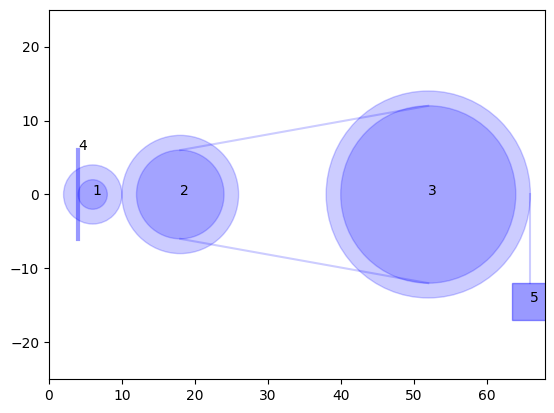

In [6]:
def plotTk(plt):
    global r1, r2, r3, R1, R2, R3, var
    v = var[0]

    plt.axis([0, 68, -25, 25])
    #plt.axis ("equal")

    axer = [
        [0, 1.5*R1, 2.5*R1+3.*R3, 2.5*R1+R3],
        [0, 1.5*R1, 2.5*R1+R2, 2.5*R1+3*R3],
        [0, 1.5*r2+3.5*R3+R1, 1.5*r2, 1.5*r2+2.5*R3],
        [0, 3*R2+R1, R2, 3*R2+R1+r1+R3],
        [0, 2*R3+r1, 2*R3+r1+3*R2, R3],
        [0, 2*R3+3*R2+R1, 2*R3+R2, R3],
        [0, 1.5*R1, 2.5*R1+2*r3+R3+R2, 2.5*R1+2*r3],
        [0, 1.5*R1, 2.5*R1+R2, 2.5*R1+3*R2+R3],
        [0, 3.5*R2+R1, 1.5*R2, 3.5*R2+2*R1+R3],
        [0, 1.5*R1, 2.5*R1+R2, 2.5*R1+3*R2+R3]

    ]

    sopr = [
        [(axer[v][2], axer[v][3]), (r2, r3), (-r2, -r3)],
        [(axer[v][2], axer[v][3]), (r2, r3), (-r2, -r3)],
        [(axer[v][2], axer[v][3]), (R2, r3), (-R2, -r3)],
        [(axer[v][1], axer[v][2]), (R1, R2), (-R1, -R2)],
        [(axer[v][1], axer[v][2]), (R1, r2), (-R1, -r2)],
        [(axer[v][1], axer[v][2]), (R1, r2), (-R1, -r2)],
        [(axer[v][1], axer[v][3]), (r1, r3), (-r1, -r3)],
        [(axer[v][2], axer[v][3]), (r2, R3), (-r2, -R3)],
        [(axer[v][1], axer[v][2]), (r1, r2), (-r1, -r2)],
        [(axer[v][2], axer[v][3]), (r2, R3), (-r2, -R3)]
    ]

    detal = [
        [(axer[v][1]-r1, axer[v][1]-r1), (axer[v][2]+R2, axer[v][2]+R2), (axer[v][2]+R2-2.5,-r3)],
        [(axer[v][1]-r1, axer[v][1]-r1), (axer[v][3]+R3, axer[v][3]+R3), (axer[v][3]+R3-2.5,-r3)],
        [(axer[v][2]-r2, axer[v][2]-r2), (axer[v][1]+r1, axer[v][1]+r1), (axer[v][1]+r1-2.5,-r3)],
        [(axer[v][2]-r2, axer[v][2]-r2), (axer[v][3]+r3, axer[v][3]+r3), (axer[v][3]+r3-2.5,-r3)],
        [(axer[v][3]-r3, axer[v][3]-r3), (axer[v][2]+R2, axer[v][2]+R2), (axer[v][2]+R2-2.5, -r3)],
        [(axer[v][3]-r3, axer[v][3]-r3), (axer[v][1]+r1, axer[v][1]+r1), (axer[v][1]+r1-2.5,-r3)],
        [(axer[v][1]-R1, axer[v][1]-R1), (axer[v][2]+r2, axer[v][2]+r2), (axer[v][2]+r2-2.5,-r3)],
        [(axer[v][1]-R1, axer[v][1]-R1), (axer[v][3]+r3, axer[v][3]+r3), (axer[v][3]+r3-2.5,-r3)],
        [(axer[v][2]-R2, axer[v][2]-R2), (axer[v][3]+r3, axer[v][3]+r3), (axer[v][3]+r3-2.5,-r3)],
        [(axer[v][1]-r1, axer[v][1]-r1), (axer[v][3]+r3, axer[v][3]+r3), (axer[v][3]+r3-2.5,-r3)]
    ]

    cr1 = plt.Circle ((axer[v][1], 0), radius= r1 , color='blue', alpha= .2 )
    cR1 = plt.Circle ((axer[v][1], 0), radius= R1 , color='blue', alpha= .2 )
    cr2 = plt.Circle ((axer[v][2], 0), radius= r2 , color='blue', alpha= .2 )
    cR2 = plt.Circle ((axer[v][2], 0), radius= R2 , color='blue', alpha= .2 )
    cr3 = plt.Circle ((axer[v][3], 0), radius= r3 , color='blue', alpha= .2 )
    cR3 = plt.Circle ((axer[v][3], 0), radius= R3 , color='blue', alpha= .2 )

    plt.text(axer[v][1], 0, '1', fontsize=10)
    plt.text(axer[v][2], 0, '2', fontsize=10)
    plt.text(axer[v][3], 0, '3', fontsize=10)
    plt.text(detal[v][0][0], r2, '4', fontsize=10)
    plt.text(detal[v][1][0], -r3-2.5, '5', fontsize=10)

    plt.gca().add_artist(cr1)
    plt.gca().add_artist(cR1)
    plt.gca().add_artist(cr2)
    plt.gca().add_artist(cR2)
    plt.gca().add_artist(cr3)
    plt.gca().add_artist(cR3)

    plt.plot(sopr[v][0], sopr[v][1], color='blue', alpha= .2)
    plt.plot(sopr[v][0], sopr[v][2], color='blue', alpha= .2)

    plt.plot(detal[v][0], (r2, -r2), lw=3, color='blue', alpha= .4)
    plt.plot(detal[v][1], (0, -r3), color='blue', alpha= .2)

    rectangle = plt.Rectangle(detal[v][2], 5, -5, color='blue', alpha= .4)
    plt.gca().add_patch(rectangle)

plotTk(plt)